In [1]:
### En este ejercicio se va a generar un dataset bidimensional compuesto por 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.model_selection import train_test_split
from sklearn import neighbors, metrics

## Dataset Class definition

In [3]:
## creating a new class for my dataset

class gauss2D_dataset:

    def __init__(self, mean1, cov1, mean2, cov2, size_1, size_2):
        
        self.data = np.random.multivariate_normal(mean1, cov_1, size_1)
        self.data = np.concatenate((self.data, np.random.multivariate_normal(mean2, cov_2, size_2)))
        self.target = np.concatenate((np.zeros(size_1), np.ones(size_2)))
        self.target_names = dict([(0, "class A"), (1,"class B")])

###  Mean vectors and covariance matrixes definiton

In [4]:
size_1 = 100;  size_2 = 100

sigma1_x = 2; sigma1_y = 5
sigma2_x = 2; sigma2_y = 4
mu1_x = 3; mu1_y = 6
mu2_x = 5; mu2_y = 6

mean1 = np.array([mu1_x, mu1_y])
mean2 = np.array([mu2_x, mu2_y])

cov_1 = [[sigma1_x, 0], [0, sigma1_y]]
cov_2 = [[sigma2_x, 0], [0, sigma2_y]]

### Data set generation

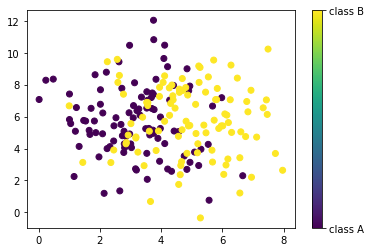

In [17]:
my_samples = gauss2D_dataset(mean1, cov_1, mean2, cov_2, size_1, size_2)

# Plot the dataset
formatter = plt.FuncFormatter(lambda i, *args: my_samples.target_names[i])
plt.scatter(my_samples.data[:,0], my_samples.data[:,1], c=my_samples.target)
plt.colorbar(ticks=[0, 1], format=formatter)

### Splitting the dataset into  test / train (50% each) and train a K-NN clasifier K = 10

In [6]:
data_train, data_test, target_train, target_test = train_test_split(my_samples.data, my_samples.target, test_size=0.5, random_state = 1)

knn = neighbors.KNeighborsClassifier(n_neighbors = 10).fit(data_train, target_train)
knn_k5 = neighbors.KNeighborsClassifier(n_neighbors = 20).fit(data_train, target_train)
predicted_labels = [knn.predict(data_test), knn_k5.predict(data_test)]

### Plot predicted data for different values of K

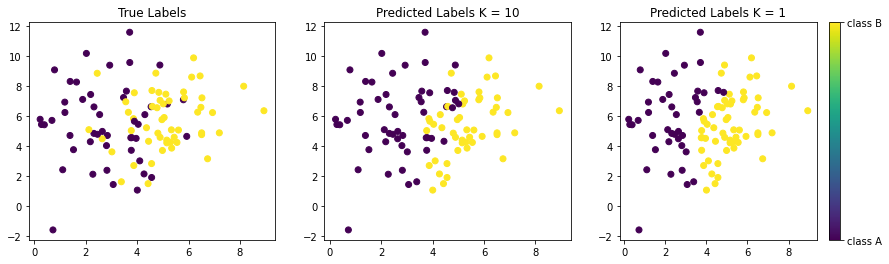

In [7]:
formatter = plt.FuncFormatter(lambda i, *args: my_samples.target_names[i])
plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
plt.scatter(data_test[:,0], data_test[:,1], c=target_test)
plt.title('True Labels')
plt.subplot(1,3,2)
plt.scatter(data_test[:,0], data_test[:,1], c=predicted_labels[0])
plt.title('Predicted Labels K = 10')
plt.subplot(1,3,3)
plt.scatter(data_test[:,0], data_test[:,1], c=predicted_labels[1])
plt.title('Predicted Labels K = 1')
plt.colorbar(ticks=[0, 1], format=formatter)

## Model Evaluation


### f-measure. 

In [8]:
fmeas = metrics.f1_score(target_test, predicted_labels[0])
print("f-measure for k = 10 and 0.5 percent of data test: %f" %fmeas )
recall = metrics.recall_score(target_test, predicted_labels[0])
print("recall for k = 10 and 0.5 percent of data test: %f" %recall )

f-measure for k = 10 and 0.5 percent of data test: 0.760000
recall for k = 10 and 0.5 percent of data test: 0.730769


### Accuracy vs K (data test 50%)

In [9]:
K = [1, 2, 3, 5, 10, 15, 20, 30, 50, 60, 70, 90]
accur = []


for k in K:
    knn = neighbors.KNeighborsClassifier(n_neighbors = k).fit(data_train, target_train)
    predicted_labels= knn.predict(data_test)
    ## Return the fraction of correctly clasified samples
    accur.append(metrics.accuracy_score(target_test, predicted_labels))
 

Text(0.5, 0, 'K')

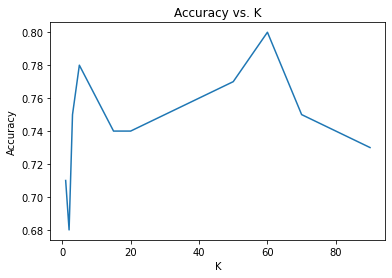

In [10]:
plt.plot(K, accur)
plt.title('Accuracy vs. K')
plt.ylabel('Accuracy')
plt.xlabel('K')

### Accuracy vs % test (k = 10)

In [22]:
test_size = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
accur = []
for size in test_size:
    data_train, data_test, target_train, target_test = train_test_split(my_samples.data, my_samples.target, test_size=size, random_state = 1)
    knn = neighbors.KNeighborsClassifier(n_neighbors = 10).fit(data_train, target_train)
    predicted_labels = knn.predict(data_test)
    accur.append(metrics.accuracy_score(target_test, predicted_labels))

Text(0.5, 0, 'Test Size')

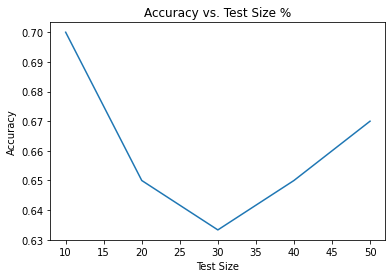

In [23]:
plt.plot(test_size*100, accur)
plt.title('Accuracy vs. Test Size %')
plt.ylabel('Accuracy')
plt.xlabel('Test Size')

### Hice el analisis para varios N haciendo variar el K y el valor optimo parece estar en un 20% para test y 80% para train A medida que aumenta la cantidad de datos usados para test pasan cosas raras, asumo que es debido a que el modelo queda demasiado sesgado y se inclina por la clase mayoritaria.

### La metrica de precicion tambien veo que depende de la aleatoriedad con la que selecciono los conjuntos de test y train

In [26]:
rand_state = np.array([1, 2, 3, 4, 5])
accur = []
for state in rand_state:
    data_train, data_test, target_train, target_test = train_test_split(my_samples.data, my_samples.target, test_size=size, random_state = state)
    knn = neighbors.KNeighborsClassifier(n_neighbors = 10).fit(data_train, target_train)
    predicted_labels = knn.predict(data_test)
    accur.append(metrics.accuracy_score(target_test, predicted_labels))

Text(0.5, 0, 'Test Size')

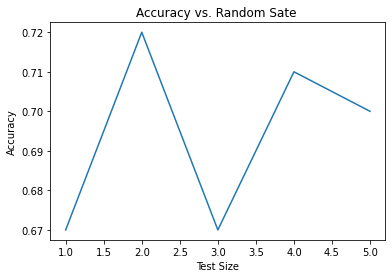

In [28]:
plt.plot(rand_state, accur)
plt.title('Accuracy vs. Random Sate ')
plt.ylabel('Accuracy')
plt.xlabel('Test Size')